**Network Science**  
We live in a highly connected world where social networks significantly affect our lives, from getting jobs, connecting with friends, and dating and news. Network science is the study of such complex networks.  
There is some common phenomenon that applies to social networks:
####  How do networks evolve
A social network is constantly evolving; people make new friends and lose touch with other friends. Many external factors in life, like marriage, new college, school, workplace or club, can spark the creation of new friends. This phenomenon is observed in vast networks such as the internet. Is there any model that can explain the growth of networks? If so, we can simulate new networks, identify what parameters influence the growth of new networks etc. [Power law](https://www.futurelearn.com/info/courses/social-media/0/steps/16046) explains some real-world examples of the growth and scale of networks.
####  Small World Phenomena
Small world phenomenon states that everyone in the world can be reached thru a short chain of acquaintances. This was first demonstrated in the [Milgram experiment](https://www.simplypsychology.org/milgram.html) where random people were asked to send a letter to a stockbroker in Boston by passing it through people they know. Of the letters received, they went thru an average of 6 people. Facebook repeated this on a large scale later, which validated this with a lower number of connections. This indicates that most people are connected to every other random person on earth within six common friends.
####  Homophily
This can be described as "Birds of a feather flock together". We tend to be friends with friends who are similar to us, especially people from the same socio-economic background, social background, etc.
####  Strength of weak ties
If two people in a social network have a friend in common, then there is an increased likelihood that they will become friends at some point in the future. This also depends on the strength of the friendship(ties). Generally, people in the same network will have the same kind of information. Take an example of jobs; everyone in the same friend circle will have the same information about open positions for jobs. It is the weak ties, friends whom we have not interacted with within some time, who have new information which will help most people to find jobs. This is called as the strength of weak ties.  
  
Let us look at a small network of friends in [Zachary karate club](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC122977/). Zachary's karate club is a university-based karate club consisting of a social network of 34 members. W.W. Zachary famously observed the karate club for three years (from 1970 to 1972), documenting links between pairs of members who interacted outside the everyday activities of the club. The nodes in the graph represent people, and the edges represent friendships (interactions) between them.

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


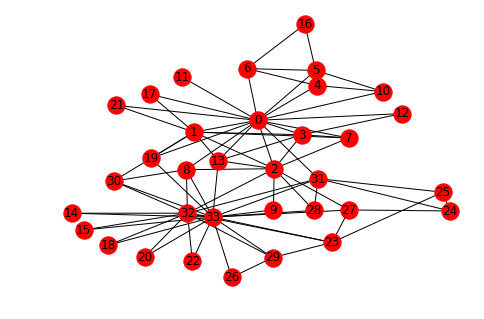

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
G = nx.karate_club_graph()
nx.draw_kamada_kawai(G, with_labels=True)

We can understand the network using some statistics about the network.  
#### Network Statistics
##### Degree Distribution
The degree of a node is the number of nodes a particular node is connected to. For example, node 11 has one degree in the karate club network as it is connected to one node only(node 0). The degree distribution is the relative frequencies of the nodes that have particular degrees. There are two types of degree distributions generally, Poisson and scale-free. For the karate club network, the degree distribution is:

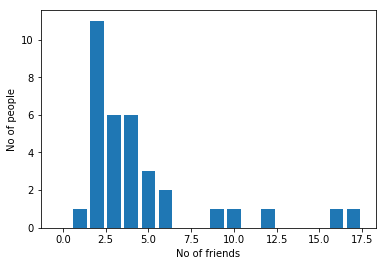

In [14]:
degree_dist = nx.degree_histogram(G)

plt.bar(range(len(degree_dist)), degree_dist)
plt.ylabel('No of people')
plt.xlabel('No of friends');

This indicates that most people have 2-5 friends while a few people are connected to >15 people in the network.  
##### Clustering coefficient
Another statistic that we can understand is the clustering coefficient. This is the degree to which nodes cluster together. If A is friends with B and C, then B and c have a high probability of being friends if they belong to the same cluster. the clustering coefficient captures the fraction of triads (connected A, B and C) in the network. The clustering coefficient of all the nodes is calculated. The clustering coefficient of a node is the percentage of triangles that are there among the nodes that it is connected to. For example, node 11 is connected to node 6 and 5, both of which are connected. So the percentage of triads is 100%. Node 4 is connected to 0, 6 and 10. 0-6-4 and 0-10-0 make a triad, but 0-10-4 does not exist. Therefore the percentage is 66.6%.  
The clustering coefficient of the network is the average of the clustering coefficient across all the nodes, and it is 57% for the karate club.

In [15]:
nx.clustering(G)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

In [17]:
nx.algorithms.cluster.average_clustering(G)

0.5706384782076823

#### Community Detection
During the study in Karate club, a conflict arose between the club president 'A' and instructor 'B' (pseudonyms), which led to a split in the club. Half of the members formed a new club around A (group one) and the remaining members under B. Can we identify the 2 communities in this network?  
##### Girvan Newman 
Community detection is close to clustering in machine learning. In clustering, we do the clustering based on the distance between the points when placed in an n-dimensional space. Similar to clustering, in community detection, we want to cluster the nodes closer to each other than others. The only difference is the concept of distance is based on the topology of the network. Like clustering, we can divide the network into two communities using top-down and bottom-up methods. This is represented by a [dendrogram](https://www.harshaash.com/hierarchical-clustering/) where we can draw a horizontal line to split the communities. This is discussed in more detail in a different blog. The two groups based on Girvan Newman are:

In [26]:
karate_club_split = nx.algorithms.community.centrality.girvan_newman(G)
karate_club_split_tuple = tuple(sorted(c) for c in next(karate_club_split))
karate_club_split_tuple

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

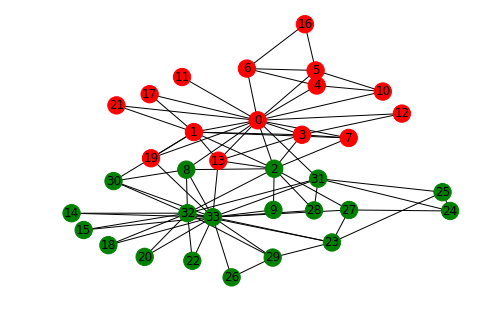

In [33]:
# To get colors in the graph
color_list = ['r' if node in karate_club_split_tuple[0] else 'g' for node in G.nodes]
nx.draw_kamada_kawai(G, node_color = color_list, with_labels=True)

##### Ratio cut
Another method is the ratio cut method. A cut is a set of edges such that if we remove them, the network breaks into two components. A network will have many cuts, and to find an optimal split, we need to:
1. Find the min-balanced-cut (cut with the minimum number of edges with an almost equal number of nodes on each side) among all pairs of nodes
2. Repeat over each of the two parts  
This is discussed in more detail in a different blog.

**References**
1. [Zachary, W. W. (1977). An Information Flow Model for Conflict and Fission in Small Groups. Journal of Anthropological Research. 33 (4), pp. 452-473.](http://www1.ind.ku.dk/complexLearning/zachary1977.pdf)
2. [Networkx Karate club](https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html)